In [174]:
import os
import json
import pandas as pd
import datetime
import math
import numpy as np
from IPython.display import clear_output

In [126]:
%run D:/Temp/NCTU/crystal/第二階段/new_alert/aggregation_function.ipynb

## 少數SAR態樣in Group A1: TWN_A1F_01, TWN_1B_01, TWN_A1C_01 -> day5

In [233]:
df = pd.read_csv("D:/NCTU/12-資料產出/NCTU/alert處理new3.csv")
feature = ['Credit_Amt', 'number_of_Credit', 'Debit_Amt','number_of_Debit', 'debit/credit']
path = 'D:/Temp/NCTU/crystal/第二階段/new_alert/日數分類_營業日/aggregation/'
save_path = 'D:/Temp/NCTU/crystal/第二階段/new_alert/日數分類_營業日/aggregation/'
day = "day5"

In [234]:
df

,alert_id,run_date,primary_entity_level_code,primary_entity_number,scenario_name,TO_SAR,Acct_No,Cust_No,Cust_Key,Cust_Segmentation,...,Extnl_Cust_Ind,Negative_News_Ind,Prim_Br_No,Obu_Ind,Riskclass_Cd,risk_score,last_risk_assessment_date,change_current_ind,change_begin_date,change_end_date
0,14481254.0,2019-03-04,ACC,FP-116007004049,TWN_A17_01,NaN,FP-116007004049,>.-.1/67;4,63163503,PH,...,N,N,116.0,N,3.0,315.18,2018-11-30,N,2018-12-14,2019-05-05 23:59:59
1,14481255.0,2019-03-04,ACC,PB-016008286512,TWN_A17_01,NaN,PB-016008286512,I.//467433,68099071,PNH,...,N,N,16.0,N,2.0,113.68,2018-11-23,N,2018-12-28,2019-03-28 23:59:59
2,14481256.0,2019-03-04,ACC,PB-025008428448,TWN_A17_01,NF,PB-025008428448,>+/250396<,63137042,PH,...,N,N,25.0,N,3.0,308.93,2018-11-30,N,2018-12-14,2019-03-07 23:59:59
3,14481257.0,2019-03-04,ACC,PB-026008470094,TWN_A17_01,NaN,PB-026008470094,C+/2227157,64347661,PNH,...,N,N,26.0,N,2.0,114.09,2018-11-30,N,2018-12-14,2019-05-01 23:59:59
4,14481258.0,2019-03-04,ACC,PB-027008462525,TWN_A17_01,NaN,PB-027008462525,A+/-032674,69939509,PNH,...,N,N,27.0,N,1.0,0.00,2019-02-23,N,2019-02-23,2019-03-31 23:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347671,16581234.0,2020-12-31,ACC,PB-141004130992,TWN_A15_01,NaN,PB-141004130992,=+/0.304:7,108579829,PNH,...,N,N,55.0,N,1.0,53.00,2020-12-31,Y,2020-12-31,5999-01-01 00:00:00
347672,16581235.0,2020-12-31,ACC,PB-146004080681,TWN_A15_01,NaN,PB-146004080681,L./0.79846,107244141,PNH,...,N,N,146.0,N,1.0,90.34,2020-06-18,Y,2020-12-04,5999-01-01 00:00:00
347673,16581237.0,2020-12-31,ACC,PB-241004057317,TWN_A15_01,NaN,PB-241004057317,I+/0.57359,105111174,PNH,...,N,N,241.0,N,1.0,62.43,2018-11-30,Y,2020-12-04,5999-01-01 00:00:00
347674,16581238.0,2020-12-31,ACC,PB-246004317763,TWN_A15_01,NaN,PB-246004317763,A+/1241355,102039956,PNH,...,N,N,26.0,N,1.0,90.34,2020-03-30,Y,2020-12-04,5999-01-01 00:00:00


In [235]:
df['TO_SAR'].value_counts()

F     645
NF    295
Name: TO_SAR, dtype: int64

In [128]:
A1 =  ['TWN_A1F_01', 'TWN_A13_01', 'TWN_A12_01', 'TWN_A1C_01', \
       'TWN_A1D_01','TWN_A11_01', 'TWN_A17_01', 'TWN_A15_01', 'TWN_A1B_01' ]

## Preprocess, day5

In [ ]:
aggregationScenarioGroup(df, A1, day, path, save_path)

In [237]:
PATH = "D:/Temp/NCTU/crystal/第二階段/new_alert/日數分類_營業日/aggregation/"
day5 = pd.read_csv(PATH+"scenarioGroup_day5_with_aggregated_txn_scenario_txn_type_key_營業日.csv")

C:\Users\NCTUUser2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [238]:
day5['TO_SAR'] = day5['TO_SAR'].replace(np.nan, 0)
day5['TO_SAR'] = day5['TO_SAR'].replace('NF', 1)
day5['TO_SAR'] = day5['TO_SAR'].replace('F', 1)

In [239]:
day5.shape

(256436, 46)

In [216]:
day5['scenario_name'].value_counts()

TWN_A1B_01    90059
TWN_A11_01    86770
TWN_A12_01    49965
TWN_A15_01    12530
TWN_A13_01     7499
TWN_A17_01     4507
TWN_A1C_01     3700
TWN_A1F_01      802
TWN_A1D_01      604
Name: scenario_name, dtype: int64

In [240]:
day5['TO_SAR'].value_counts()

0    255576
1       860
Name: TO_SAR, dtype: int64

## 針對 捷智商訊- 第二階段計畫結果整理.pptx p.14中 藍字標註的態樣，為避免SAR樣本個數太少問題，因此用Group A1整體的分布取閥值點
#### TWN_A1F_01, TWN_A1B_01, TWN_A1C_01, TWN_A1D_01

In [246]:
TWN_A1F_01 = day5[day5['scenario_name']=='TWN_A1F_01']

In [247]:
TWN_A1F_01['TO_SAR'].value_counts()

0    800
1      2
Name: TO_SAR, dtype: int64

In [248]:
scenario_except_TWN_A1F_01 = day5[day5['scenario_name']!='TWN_A1F_01']
scenario_except_TWN_A1F_01 = scenario_except_TWN_A1F_01.drop(['run_date','alert_id',\
                                                              'primary_entity_level_code','primary_entity_number', 'scenario_name','Cust_No','Acct_No'], axis = 1)

In [249]:
scenario_except_TWN_A1F_01_SAR = scenario_except_TWN_A1F_01[scenario_except_TWN_A1F_01['TO_SAR']==1]

In [250]:
scenario_except_TWN_A1F_01_SAR['TO_SAR'].value_counts()

1    858
Name: TO_SAR, dtype: int64

### TWN_A1F_01

#### Rule1: A>= or B>=
#### Scenario: Rule1 
"""    
匯存入自
    或
    匯提出至

高風險國家或地區>=&1F01_amount元

"""

In [251]:
DAY = 5
FEATURE = ['Credit_Amt', 'Debit_Amt']

In [252]:
credit_amt_threshold = []
debit_amt_threshold = []
threshold_list = [credit_amt_threshold, debit_amt_threshold]

In [253]:
for i in range(len(FEATURE)):
    tmp = []
    tmp = list(scenario_except_TWN_A1F_01_SAR[FEATURE[i]].values)
    tmp = [item for item in tmp if not math.isnan(item)]
    tmp.sort()       
    #print(tmp)
    for j in np.linspace(10, 100, 10):
        print(np.percentile(tmp, j))
        threshold_list[i].append(np.percentile(tmp, j))
    print(threshold_list[i])
    print()

0.0
0.0
0.0
0.0
0.0
21069.199999999633
486179.0
800000.0
1350708.0000000002
39258714.0
[0.0, 0.0, 0.0, 0.0, 0.0, 21069.199999999633, 486179.0, 800000.0, 1350708.0000000002, 39258714.0]

0.0
88003.00000000012
329991.0
458200.0000000001
600000.0
785926.3999999991
951846.5
1180000.0
1800000.0
157580516.0
[0.0, 88003.00000000012, 329991.0, 458200.0000000001, 600000.0, 785926.3999999991, 951846.5, 1180000.0, 1800000.0, 157580516.0]



1200000.0    16
1050000.0    14
1000000.0     9
900000.0      7
1350000.0     5
             ..
648850.0      1
333888.0      1
148900.0      1
174243.0      1
140800.0      1
Name: Debit_Amt, Length: 772, dtype: int64


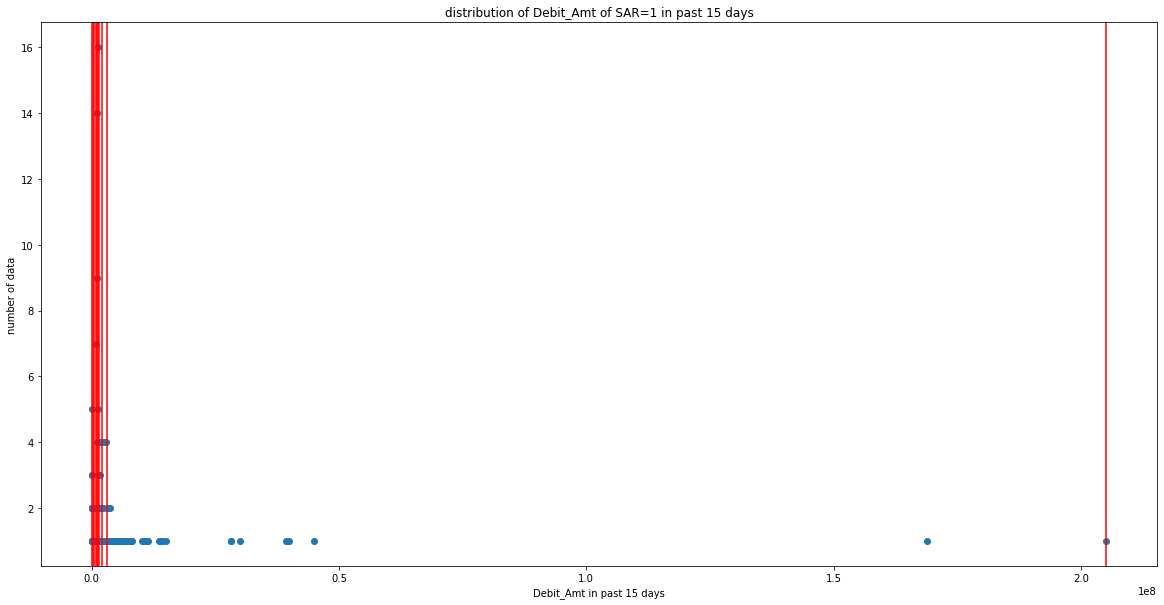

In [181]:
# Draw the decile distance
plt.figure(figsize=(20,10))
day15['Debit_Amt'].value_counts() # 存款金額
print(day15['Debit_Amt'].value_counts())
y, x = day15['Debit_Amt'].value_counts().values, day15['Debit_Amt'].value_counts().index
plt.title("distribution of Debit_Amt of SAR=1 in past 15 days")
plt.xlabel("Debit_Amt in past 15 days")
plt.ylabel("number of data")
for val in debit_amt_threshold:
    plt.axvline(val, c='r')
plt.scatter(x, y)
plt.show()

In [254]:
candidate_rule1 = []
for x in credit_amt_threshold:
    for y in debit_amt_threshold:
        candidate_rule1.append([x,y])

In [255]:
candidate_rule1 = [[math.ceil(x), math.ceil(y)] for [x,y] in candidate_rule1]

In [256]:
# apply on testing set
results = pd.DataFrame(columns = ['Credit_Amt','Debit_Amt','SAR', 'Non SAR','newSAM=1_SAR=1(TP)','newSAM=1_SAR=0(FP)',\
                                  'newSAM=0_SAR=1(FN)', 'newSAM=0_SAR=0(TN)', 'recall','filter rate'])
for thre1, thre2 in candidate_rule1:
    idx = list(set(TWN_A1F_01[TWN_A1F_01['Credit_Amt']>=thre1].index))
    idx1 = list(set(TWN_A1F_01[TWN_A1F_01['Debit_Amt']>=thre2].index)) 
    new_SAM_1_rule1 = TWN_A1F_01.iloc[idx]
    new_SAM_1_rule2 = TWN_A1F_01.iloc[idx1]

    new_SAM_1 = new_SAM_1_rule1.append(new_SAM_1_rule2)
    new_SAM_1 = new_SAM_1.drop_duplicates()
    new_SAM_0 = TWN_A1F_01.drop(index = new_SAM_1.index)

    if (new_SAM_0.shape[0]+new_SAM_1.shape[0])!=TWN_A1F_01.shape[0]:
        raise ValueError("new SAM 0 and new SAM 1 overlapped!")

    TP = new_SAM_1[new_SAM_1['TO_SAR']!=0].shape[0]
    TN = new_SAM_0[new_SAM_0['TO_SAR']==0].shape[0]
    FP = new_SAM_1[new_SAM_1['TO_SAR']==0].shape[0]
    FN = new_SAM_0[new_SAM_0['TO_SAR']!=0].shape[0]
    total = TWN_A1F_01.shape[0]
    results = results.append({'Credit_Amt':thre1, 'Debit_Amt':thre2,  'SAR':TWN_A1F_01[TWN_A1F_01['TO_SAR']==1].shape[0],\
                              'Non SAR':TWN_A1F_01[TWN_A1F_01['TO_SAR']==0].shape[0],\
                              'newSAM=1_SAR=1(TP)':TP, 'newSAM=1_SAR=0(FP)':FP, 'newSAM=0_SAR=1(FN)':FN,\
                              'newSAM=0_SAR=0(TN)':TN, 'recall': str(round(TP/(TP+FN), 4)),\
                              'filter rate':str((round((TN+FN)/total, 4)))}, ignore_index = True)


In [257]:
TWN_A1F_01['TO_SAR'].value_counts()

0    800
1      2
Name: TO_SAR, dtype: int64

In [259]:
results[results['recall']>=str(0.9)].sort_values(by='filter rate', ascending=False).drop_duplicates()[:10]

,Credit_Amt,Debit_Amt,SAR,Non SAR,newSAM=1_SAR=1(TP),newSAM=1_SAR=0(FP),newSAM=0_SAR=1(FN),newSAM=0_SAR=0(TN),recall,filter rate
93,39258714,458201,2,800,2,176,0,624,1.0,0.7781
83,1350709,458201,2,800,2,198,0,602,1.0,0.7506
92,39258714,329991,2,800,2,218,0,582,1.0,0.7257
73,800000,458201,2,800,2,219,0,581,1.0,0.7244
82,1350709,329991,2,800,2,240,0,560,1.0,0.6983
72,800000,329991,2,800,2,260,0,540,1.0,0.6733
63,486179,458201,2,800,2,263,0,537,1.0,0.6696
62,486179,329991,2,800,2,304,0,496,1.0,0.6185
91,39258714,88004,2,800,2,412,0,388,1.0,0.4838
81,1350709,88004,2,800,2,434,0,366,1.0,0.4564


### TWN_A1D_01

#### Rule1: A>= or B>=
"""借方累計金額>=&1D01_amount
    或
    貸方累計金額>=&1D01_amount"""

In [277]:
TWN_A1D_01 = day5[day5['scenario_name']=='TWN_A1D_01'].reset_index(drop=True)

In [278]:
TWN_A1D_01['TO_SAR'].value_counts()

0    603
1      1
Name: TO_SAR, dtype: int64

In [279]:
scenario_except_TWN_A1D_01 = day5[day5['scenario_name']!='TWN_A1D_01'].reset_index(drop=True)
scenario_except_TWN_A1D_01 = scenario_except_TWN_A1D_01.drop(['run_date','alert_id',\
                                                              'primary_entity_level_code','primary_entity_number', 'scenario_name','Cust_No','Acct_No'], axis = 1)

In [280]:
scenario_except_TWN_A1D_01_SAR = scenario_except_TWN_A1D_01[scenario_except_TWN_A1D_01['TO_SAR']==1]

In [281]:
scenario_except_TWN_A1D_01_SAR['TO_SAR'].value_counts()

1    859
Name: TO_SAR, dtype: int64

In [286]:
DAY = 5
FEATURE = ['Credit_Amt', 'Debit_Amt']

In [287]:
credit_amt_threshold = []
debit_amt_threshold = []
threshold_list = [credit_amt_threshold,  debit_amt_threshold]

In [288]:
for i in range(len(FEATURE)):
    tmp = []
    tmp = list(scenario_except_TWN_A1F_01_SAR[FEATURE[i]].values)
    tmp = [item for item in tmp if not math.isnan(item)]
    tmp.sort()       
    #print(tmp)
    for j in np.linspace(10, 100, 10):
        print(np.percentile(tmp, j))
        threshold_list[i].append(np.percentile(tmp, j))
    print(threshold_list[i])
    print()

0.0
0.0
0.0
0.0
0.0
21069.199999999633
486179.0
800000.0
1350708.0000000002
39258714.0
[0.0, 0.0, 0.0, 0.0, 0.0, 21069.199999999633, 486179.0, 800000.0, 1350708.0000000002, 39258714.0]

0.0
88003.00000000012
329991.0
458200.0000000001
600000.0
785926.3999999991
951846.5
1180000.0
1800000.0
157580516.0
[0.0, 88003.00000000012, 329991.0, 458200.0000000001, 600000.0, 785926.3999999991, 951846.5, 1180000.0, 1800000.0, 157580516.0]



In [289]:
credit_amt_threshold

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 21069.199999999633,
 486179.0,
 800000.0,
 1350708.0000000002,
 39258714.0]

In [290]:
debit_amt_threshold

[0.0,
 88003.00000000012,
 329991.0,
 458200.0000000001,
 600000.0,
 785926.3999999991,
 951846.5,
 1180000.0,
 1800000.0,
 157580516.0]

400000.0     6
700000.0     4
900000.0     3
580000.0     3
1100000.0    3
            ..
205735.0     1
120280.0     1
150182.0     1
199333.0     1
1104900.0    1
Name: Credit_Amt, Length: 591, dtype: int64


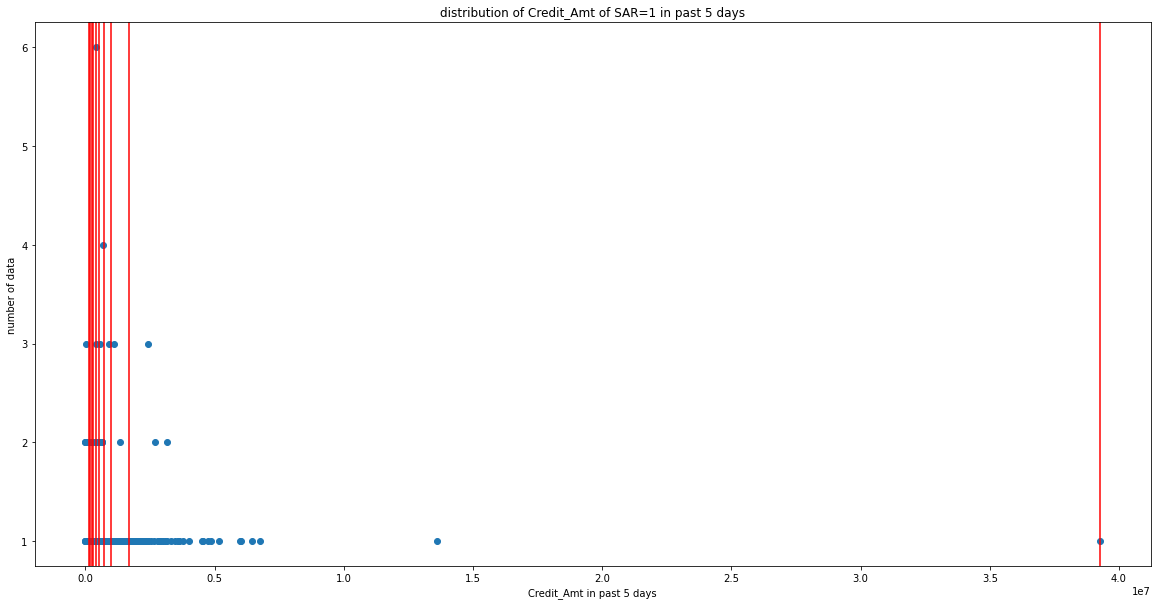

In [151]:
# Draw the decile distance
plt.figure(figsize=(20,10))
day5['Credit_Amt'].value_counts() # 存款金額
print(day5['Credit_Amt'].value_counts())
y, x = day5['Credit_Amt'].value_counts().values, day5['Credit_Amt'].value_counts().index
plt.title("distribution of Credit_Amt of SAR=1 in past 5 days")
plt.xlabel("Credit_Amt in past 5 days")
plt.ylabel("number of data")
for val in credit_amt_threshold:
    plt.axvline(val, c='r')
plt.scatter(x, y)
plt.show()

300000.0     14
600000.0     14
400000.0     13
1050000.0    11
900000.0      8
             ..
501070.0      1
90195.0       1
1188805.0     1
380070.0      1
140800.0      1
Name: Debit_Amt, Length: 743, dtype: int64


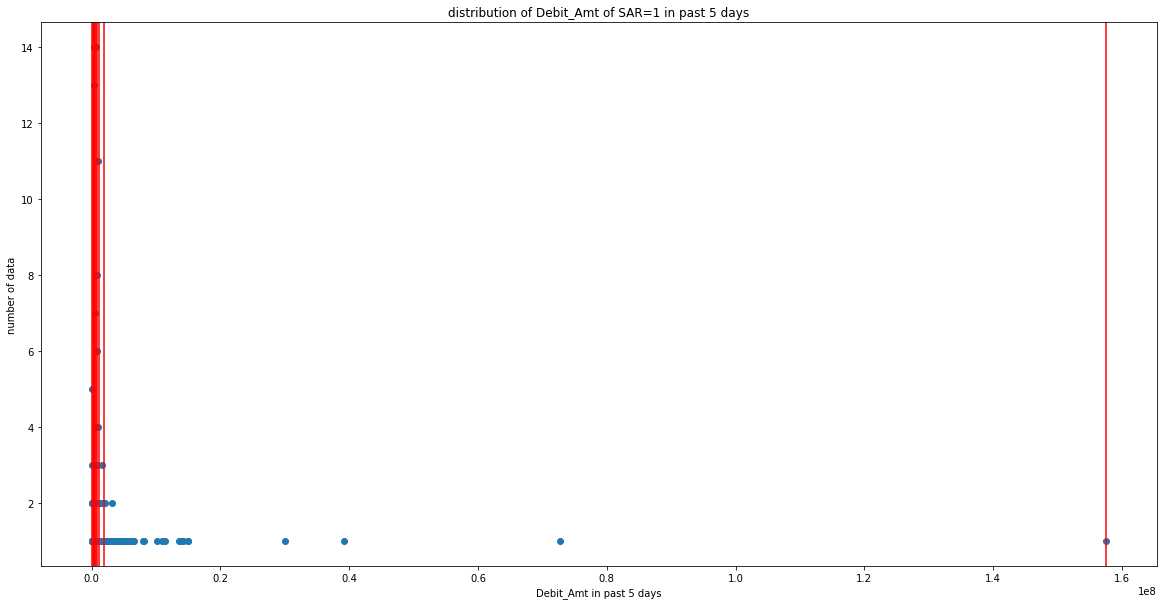

In [141]:
# Draw the decile distance
plt.figure(figsize=(20,10))
day5['Debit_Amt'].value_counts() # 存款金額
print(day5['Debit_Amt'].value_counts())
y, x = day5['Debit_Amt'].value_counts().values, day5['Debit_Amt'].value_counts().index
plt.title("distribution of Debit_Amt of SAR=1 in past 5 days")
plt.xlabel("Debit_Amt in past 5 days")
plt.ylabel("number of data")
for val in debit_amt_threshold:
    plt.axvline(val, c='r')
plt.scatter(x, y)
plt.show()

In [291]:
candidate_rule1 = []
for x in credit_amt_threshold:
    for y in debit_amt_threshold:
        candidate_rule1.append([x,y])

In [293]:
candidate_rule1 = [[math.ceil(x), math.ceil(y)] for [x,y] in candidate_rule1]

In [294]:
# apply on testing set
results = pd.DataFrame(columns = ['Credit_Amt','Debit_Amt','SAR', 'Non SAR','newSAM=1_SAR=1(TP)','newSAM=1_SAR=0(FP)',\
                                  'newSAM=0_SAR=1(FN)', 'newSAM=0_SAR=0(TN)', 'recall','filter rate'])
for thre1, thre2 in candidate_rule1:
    idx = list(set(TWN_A1D_01[TWN_A1D_01['Credit_Amt']>=thre1].index))
    idx1 = list(set(TWN_A1D_01[TWN_A1D_01['Debit_Amt']>=thre2].index))
    new_SAM_1_rule1 = TWN_A1D_01.iloc[idx]
    new_SAM_1_rule2 = TWN_A1D_01.iloc[idx1]

    new_SAM_1 = new_SAM_1_rule1.append(new_SAM_1_rule2)
    new_SAM_1 = new_SAM_1.drop_duplicates()
    new_SAM_0 = TWN_A1D_01.drop(index = new_SAM_1.index)

    if (new_SAM_0.shape[0]+new_SAM_1.shape[0])!=TWN_A1D_01.shape[0]:
        raise ValueError("new SAM 0 and new SAM 1 overlapped!")

    TP = new_SAM_1[new_SAM_1['TO_SAR']!=0].shape[0]
    TN = new_SAM_0[new_SAM_0['TO_SAR']==0].shape[0]
    FP = new_SAM_1[new_SAM_1['TO_SAR']==0].shape[0]
    FN = new_SAM_0[new_SAM_0['TO_SAR']!=0].shape[0]
    total = TWN_A1D_01.shape[0]
    results = results.append({'Credit_Amt':thre1,'Debit_Amt':thre2, 'SAR':TWN_A1D_01[TWN_A1D_01['TO_SAR']!=0].shape[0], \
                              'Non SAR':TWN_A1D_01[TWN_A1D_01['TO_SAR']==0].shape[0],\
                              'newSAM=1_SAR=1(TP)':TP, 'newSAM=1_SAR=0(FP)':FP, 'newSAM=0_SAR=1(FN)':FN,\
                              'newSAM=0_SAR=0(TN)':TN, 'recall': str(round(TP/(TP+FN), 4)),\
                              'filter rate':str((round((TN+FN)/total, 4)))}, ignore_index = True)


In [295]:
results = results[results['recall']>= str(0.9)]
results

,Credit_Amt,Debit_Amt,SAR,Non SAR,newSAM=1_SAR=1(TP),newSAM=1_SAR=0(FP),newSAM=0_SAR=1(FN),newSAM=0_SAR=0(TN),recall,filter rate
0,0,0,1,603,1,390,0,213,1.0,0.3526
1,0,88004,1,603,1,390,0,213,1.0,0.3526
2,0,329991,1,603,1,390,0,213,1.0,0.3526
3,0,458201,1,603,1,390,0,213,1.0,0.3526
4,0,600000,1,603,1,390,0,213,1.0,0.3526
...,...,...,...,...,...,...,...,...,...,...
94,39258714,600000,1,603,1,233,0,370,1.0,0.6126
95,39258714,785927,1,603,1,233,0,370,1.0,0.6126
96,39258714,951847,1,603,1,233,0,370,1.0,0.6126
97,39258714,1180000,1,603,1,233,0,370,1.0,0.6126


In [296]:
results.sort_values(by=['filter rate'], ascending = False)[:10]

,Credit_Amt,Debit_Amt,SAR,Non SAR,newSAM=1_SAR=1(TP),newSAM=1_SAR=0(FP),newSAM=0_SAR=1(FN),newSAM=0_SAR=0(TN),recall,filter rate
98,39258714,1800000,1,603,1,233,0,370,1.0,0.6126
97,39258714,1180000,1,603,1,233,0,370,1.0,0.6126
96,39258714,951847,1,603,1,233,0,370,1.0,0.6126
95,39258714,785927,1,603,1,233,0,370,1.0,0.6126
94,39258714,600000,1,603,1,233,0,370,1.0,0.6126
93,39258714,458201,1,603,1,233,0,370,1.0,0.6126
92,39258714,329991,1,603,1,233,0,370,1.0,0.6126
91,39258714,88004,1,603,1,234,0,369,1.0,0.6109
62,486179,329991,1,603,1,293,0,310,1.0,0.5132
68,486179,1800000,1,603,1,293,0,310,1.0,0.5132
